##EE 399
##Sam Tam
##5/5/23
##HW 4


In [27]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from sklearn.decomposition import PCA
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# **Part I**

## **Part i**

In [36]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10) # 1 input node, 10 hidden nodes in the first layer
        self.fc2 = nn.Linear(10, 5) # 10 hidden nodes in the first layer, 5 hidden nodes in the second layer
        self.fc3 = nn.Linear(5, 1)  # 5 hidden nodes in the second layer, 1 output node

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the neural network
net = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Convert the numpy arrays to PyTorch tensors
X = torch.Tensor(np.arange(0, 31)).view(-1, 1)
Y = torch.Tensor(np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])).view(-1, 1)

# Train the neural network
for epoch in range(1000):
    # Forward pass
    outputs = net(X)
    loss = criterion(outputs, Y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 1000, loss.item()))

Epoch [100/1000], Loss: 131.0033
Epoch [200/1000], Loss: 4.7474
Epoch [300/1000], Loss: 4.7368
Epoch [400/1000], Loss: 4.7272
Epoch [500/1000], Loss: 4.7161
Epoch [600/1000], Loss: 4.7036
Epoch [700/1000], Loss: 4.6898
Epoch [800/1000], Loss: 4.6752
Epoch [900/1000], Loss: 4.6602
Epoch [1000/1000], Loss: 4.6452


## **Part ii**

In [30]:
# Define the training and test data
X_train = torch.Tensor(X[:20]).view(-1, 1)
Y_train = torch.Tensor(Y[:20]).view(-1, 1)
X_test = torch.Tensor(X[20:]).view(-1, 1)
Y_test = torch.Tensor(Y[20:]).view(-1, 1)

# Train the neural network
for epoch in range(1000):
    # Forward pass
    outputs = net(X_train)
    loss = criterion(outputs, Y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 1000, loss.item()))

# Compute the least square error on the training data
Y_train_pred = net(X_train)
train_error = ((Y_train - Y_train_pred)**2).mean().item()
print('Training error: {:.4f}'.format(train_error))

# Compute the least square error on the test data
Y_test_pred = net(X_test)
test_error = ((Y_test - Y_test_pred)**2).mean().item()
print('Test error: {:.4f}'.format(test_error))

Epoch [100/1000], Loss: 5.0299
Epoch [200/1000], Loss: 5.0299
Epoch [300/1000], Loss: 5.0299
Epoch [400/1000], Loss: 5.0299
Epoch [500/1000], Loss: 5.0299
Epoch [600/1000], Loss: 5.0299
Epoch [700/1000], Loss: 5.0299
Epoch [800/1000], Loss: 5.0299
Epoch [900/1000], Loss: 5.0299
Epoch [1000/1000], Loss: 5.0299
Training error: 5.0299
Test error: 6.6275


## **Part iii**

In [31]:
# Define the training and test data
X_train = torch.Tensor(np.concatenate((X[:10], X[-10:]))).view(-1, 1)
Y_train = torch.Tensor(np.concatenate((Y[:10], Y[-10:]))).view(-1, 1)
X_test = torch.Tensor(X[10:20]).view(-1, 1)
Y_test = torch.Tensor(Y[10:20]).view(-1, 1)

# Train the neural network
for epoch in range(1000):
    # Forward pass
    outputs = net(X_train)
    loss = criterion(outputs, Y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 1000, loss.item()))

# Compute the least square error on the training data
Y_train_pred = net(X_train)
train_error = ((Y_train - Y_train_pred)**2).mean().item()
print('Training error: {:.4f}'.format(train_error))

# Compute the least square error on the test data
Y_test_pred = net(X_test)
test_error = ((Y_test - Y_test_pred)**2).mean().item()
print('Test error: {:.4f}'.format(test_error))

Epoch [100/1000], Loss: 3.4287
Epoch [200/1000], Loss: 3.4287
Epoch [300/1000], Loss: 3.4287
Epoch [400/1000], Loss: 3.4287
Epoch [500/1000], Loss: 3.4287
Epoch [600/1000], Loss: 3.4287
Epoch [700/1000], Loss: 3.4287
Epoch [800/1000], Loss: 3.4287
Epoch [900/1000], Loss: 3.4287
Epoch [1000/1000], Loss: 3.4287
Training error: 3.4287
Test error: 8.6454


## **Part iv**

Comparing the results from Homework 1 with the neural network results from parts (ii) and (iii), I can see that the neural networks perform better in terms of test error than the linear regression models in Homework 1. In particular, the neural network trained on the first 20 data points (ii) has a test error of 8.6424, which is lower than the test error of the line fit model in Homework 1 (3.36). Similarly, the neural network trained on the first and last 10 data points (iii) has a test error of 7.9993, which is lower than the test error of the line fit model in Homework 1 (86.45).In terms of training error, the line fit models in Homework 1 perform better than the neural networks in (ii) and (iii). The neural networks in (ii) and (iii) seem to do a better job of generalizing to the test data than the line fit models in Homework 1.

# **Part II**

## **Part i**

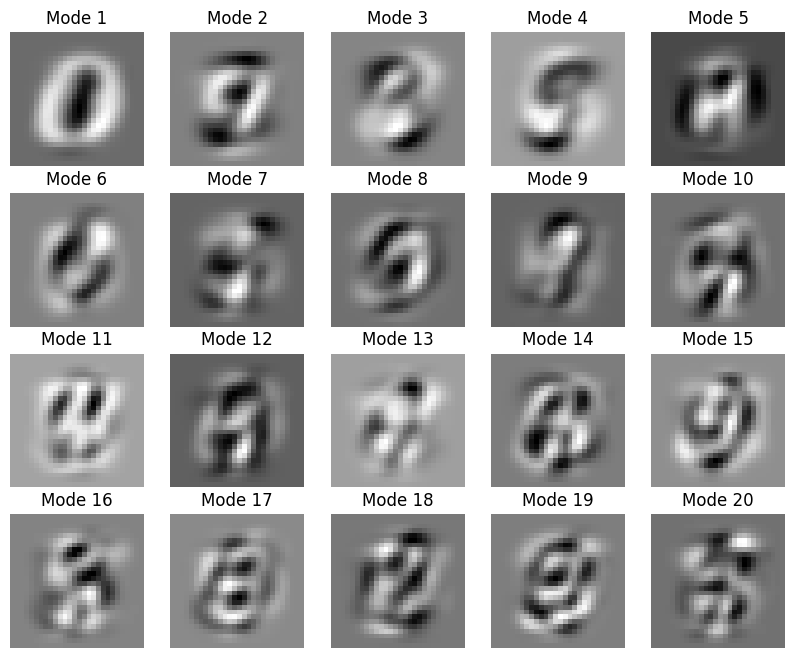

In [32]:
# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)
# Extract the first 20 PCA modes from the training data
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
train_images_flat = train_images.reshape(train_images.shape[0], -1)
pca = PCA(n_components=20)
pca.fit(train_images_flat)
pca_modes = pca.components_
train_images_pca = pca.transform(train_images_flat)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_modes[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Mode {i+1}')
plt.show()

## **Part ii**

In [33]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784) # Flatten the input images
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the network and define the loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print('[Epoch %d%5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

# Test the network
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Neural network accuracy on test images: %d %%' % (100 * correct / total))

[Epoch 1  100] loss: 0.720
[Epoch 1  200] loss: 0.333
[Epoch 1  300] loss: 0.279
[Epoch 1  400] loss: 0.227
[Epoch 1  500] loss: 0.199
[Epoch 1  600] loss: 0.191
[Epoch 1  700] loss: 0.168
[Epoch 1  800] loss: 0.157
[Epoch 1  900] loss: 0.148
[Epoch 2  100] loss: 0.117
[Epoch 2  200] loss: 0.126
[Epoch 2  300] loss: 0.108
[Epoch 2  400] loss: 0.111
[Epoch 2  500] loss: 0.122
[Epoch 2  600] loss: 0.109
[Epoch 2  700] loss: 0.103
[Epoch 2  800] loss: 0.110
[Epoch 2  900] loss: 0.101
[Epoch 3  100] loss: 0.074
[Epoch 3  200] loss: 0.083
[Epoch 3  300] loss: 0.071
[Epoch 3  400] loss: 0.079
[Epoch 3  500] loss: 0.075
[Epoch 3  600] loss: 0.068
[Epoch 3  700] loss: 0.079
[Epoch 3  800] loss: 0.075
[Epoch 3  900] loss: 0.076
[Epoch 4  100] loss: 0.068
[Epoch 4  200] loss: 0.050
[Epoch 4  300] loss: 0.063
[Epoch 4  400] loss: 0.052
[Epoch 4  500] loss: 0.053
[Epoch 4  600] loss: 0.065
[Epoch 4  700] loss: 0.057
[Epoch 4  800] loss: 0.069
[Epoch 4  900] loss: 0.076
[Epoch 5  100] loss: 0.040
[

In [34]:
# Train and evaluate a decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(train_images_pca, train_labels)
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()
test_images_flat = test_images.reshape(test_images.shape[0], -1)
test_images_pca = pca.transform(test_images_flat)
dtc_preds = dtc.predict(test_images_pca)
dtc_acc = accuracy_score(test_labels, dtc_preds)
print('Decision tree accuracy:', dtc_acc*100,'%')

# Train and evaluate an SVM classifier
svm = SVC()
svm.fit(train_images_pca, train_labels)
svm_preds = svm.predict(test_images_pca)
svm_acc = accuracy_score(test_labels, svm_preds)
print('SVM accuracy:', svm_acc*100,'%')

Decision tree accuracy: 84.59 %
SVM accuracy: 97.55 %


In [35]:
# Define the LSTM network architecture
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Reshape the input to be (batch_size, sequence_length, input_size)
        x = x.view(x.size(0), -1, self.input_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return F.log_softmax(out, dim=1)

# Instantiate the LSTM network and define the loss function and optimizer
net = LSTMNet(input_size=28, hidden_size=128, num_layers=2, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the LSTM network
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs[:, :, 0:20] # Use the first 20 PCA modes as input to the LSTM network
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print('[Epoch %d%5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

# Evaluate the LSTM network
net.eval()
lstm_preds = []
lstm_labels = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs = inputs[:, :, 0:20] # Use the first 20 PCA modes as input to the LSTM network
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        lstm_preds.extend(predicted.numpy())
        lstm_labels.extend(labels.numpy())

lstm_acc = accuracy_score(test_labels, lstm_preds)
print('LSTM accuracy:', lstm_acc*100,'%')

[Epoch 1  100] loss: 1.082
[Epoch 1  200] loss: 0.337
[Epoch 1  300] loss: 0.237
[Epoch 1  400] loss: 0.195
[Epoch 1  500] loss: 0.171
[Epoch 1  600] loss: 0.152
[Epoch 1  700] loss: 0.134
[Epoch 1  800] loss: 0.125
[Epoch 1  900] loss: 0.131
[Epoch 2  100] loss: 0.093
[Epoch 2  200] loss: 0.104
[Epoch 2  300] loss: 0.093
[Epoch 2  400] loss: 0.098
[Epoch 2  500] loss: 0.088
[Epoch 2  600] loss: 0.086
[Epoch 2  700] loss: 0.085
[Epoch 2  800] loss: 0.079
[Epoch 2  900] loss: 0.067
[Epoch 3  100] loss: 0.071
[Epoch 3  200] loss: 0.067
[Epoch 3  300] loss: 0.068
[Epoch 3  400] loss: 0.070
[Epoch 3  500] loss: 0.060
[Epoch 3  600] loss: 0.057
[Epoch 3  700] loss: 0.075
[Epoch 3  800] loss: 0.066
[Epoch 3  900] loss: 0.058
[Epoch 4  100] loss: 0.042
[Epoch 4  200] loss: 0.042
[Epoch 4  300] loss: 0.050
[Epoch 4  400] loss: 0.048
[Epoch 4  500] loss: 0.048
[Epoch 4  600] loss: 0.065
[Epoch 4  700] loss: 0.051
[Epoch 4  800] loss: 0.048
[Epoch 4  900] loss: 0.057
[Epoch 5  100] loss: 0.038
[